In [1]:
# without regularization

In [2]:
# import 

#using Pkg
#Pkg.add("Revise")

In [3]:
using Revise
includet("../codebase/mlp.jl")

using Knet, Plots, Statistics, LinearAlgebra, Random, .mlp

In [4]:
n=12 # length of input bit array
xdim = n
h1=h2=h3=2*n # hidden layer sizes
ydim = 1 # output is the probability for even parity
nbatch = 100 # number of bit strings presented at each iteration
ntest = div(2^n,8) # keep 1/8-th as test set
niter = 10^5 # number of training iterations

100000

In [5]:
# NN parameters
w1 = Param(randn(h1,xdim))
b1 = Param(randn(h1))
w2 = Param(randn(h2,h1))
b2 = Param(randn(h2))
w3 = Param(randn(h3,h2))
b3 = Param(randn(h3))
w4 = Param(randn(1,h3))
b4 = Param(randn(1))
w = (w1,w2,w3,w4)
b = (b1,b2,b3,b4)

(P(Array{Float64,1}(24)), P(Array{Float64,1}(24)), P(Array{Float64,1}(24)), P(Array{Float64,1}(1)))

In [6]:
xtrn, ytrn, xtst, ytst = mlp.gen_and_split_data(n, ntest)

([0 0 … 1 1; 0 0 … 1 1; … ; 0 1 … 1 1; 1 0 … 0 1], [1 1 … 1 0], [0 0 … 1 1; 1 1 … 1 1; … ; 0 0 … 0 0; 1 1 … 1 0], [1 1 … 1 0])

In [7]:
#w, b, losstrn, losstst = mlp.backprop(w, b, niter, n, ntest, nbatch, (xdim, h1, h2, h3, ydim));

In [8]:
plot(losstrn)
plot!(losstst) 

LoadError: UndefVarError: losstrn not defined

In [9]:
includet("../codebase/rewiring.jl")
using .rewiring

In [10]:
layer_dims = (xdim, h1, h2, h3, ydim)
A = computeKernel(w,layer_dims)
sum(A), sum(sum.(w))

(NaN, 6.86802215620644)

In [11]:
pRandPrune = 0.5 
A_pruned, xCutHead, nodeX = pruneOutDegrees(A, pRandPrune, 0)

A_pruned

85×85 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …    0.0  NaN      0.0  NaN
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     NaN      0.0  NaN      0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0  NaN      0.0  NaN
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0    0.0  NaN      0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0  NaN      0.0  NaN
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  NaN      0.0  NaN      0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0  NaN      0.0  NaN
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     NaN      0.0  NaN      0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0  NaN      0.0  NaN
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     NaN      0.0  NaN      0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …    0.0  NaN      0.0  NaN
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     NaN      0.0  NaN      0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0    0.0    0.0  NaN
 ⋮                        ⋮              ⋱                       
 

In [12]:
A[xCutHead, nodeX], A_pruned[xCutHead, nodeX]

LoadError: ArgumentError: invalid index: -1.3958067246244936 of type Float64

In [13]:
size.(w)

((24, 12), (24, 24), (24, 24), (1, 24))

In [14]:
w_pruned = computeKernel_reverse(w, A_pruned, layer_dims)
sum(sum.(w_pruned)), sum(A_pruned)

(8.263828880830932, NaN)

In [15]:
sum(w_pruned[1]-transpose(A_pruned[1:12,13:36]))

0.0

In [16]:
sum(w_pruned[2]-transpose(A_pruned[13:36,37:60]))

0.0

In [17]:
sum(w_pruned[3]-transpose(A_pruned[37:60,61:84]))

0.0

In [18]:
sum(w_pruned[4]-transpose(A_pruned[61:84,85:85]))

0.0

In [19]:
# NN parameters
w1 = Param(randn(h1,xdim))
b1 = Param(randn(h1))
w2 = Param(randn(h2,h1))
b2 = Param(randn(h2))
w3 = Param(randn(h3,h2))
b3 = Param(randn(h3))
w4 = Param(randn(1,h3))
b4 = Param(randn(1))
w = (w1,w2,w3,w4)
b = (b1,b2,b3,b4)

(P(Array{Float64,1}(24)), P(Array{Float64,1}(24)), P(Array{Float64,1}(24)), P(Array{Float64,1}(1)))

In [20]:
w, b, losstrn, losstst = mlp.backprop(w, b, niter, n, ntest, nbatch, (xdim, h1, h2, h3, ydim), p = 0.5);

┣████████████████████┫ [100.00%, 100000/100000, 01:58/01:58, 850.18i/s] 


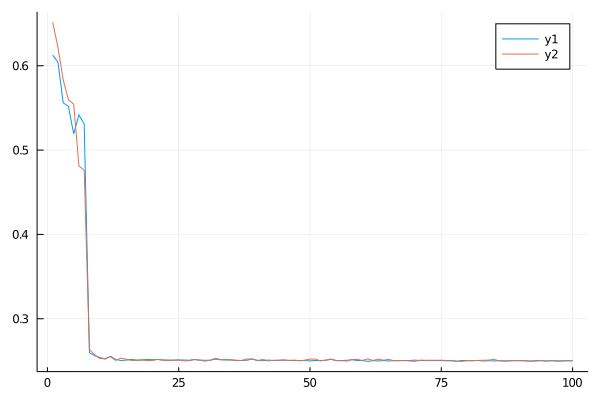

In [29]:
plot(losstrn)
plot!(losstst) 

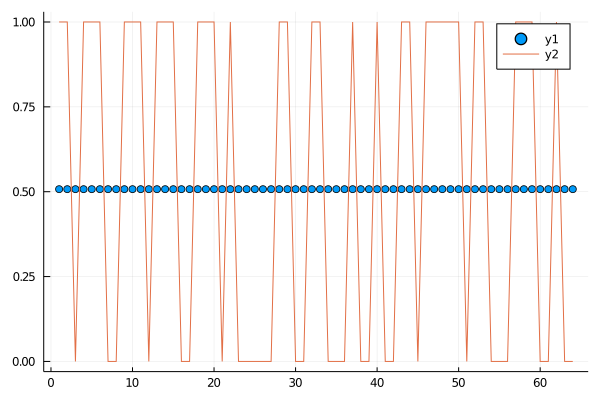

In [22]:
np=min(ntest,64)
scatter(pred(w,b,xtst)[1:np]
#    ,xlim=(0,np)
)
plot!(ytst[1:np])

In [23]:
# accuracy
function acc(w,b,x,y)
    cnt = 0
    tot = length(x[1,:])
    for i=1:tot-1
        chk = (pred(w,b,x[:,i])[1] - y[i][1])^2
        if (chk < 0.5)
            cnt += 1
        end
    end
    return 1.0*cnt/tot
end

acc (generic function with 1 method)

In [24]:
acc(w,b,xtrn,ytrn),acc(w,b,xtst,ytst)

(0.9997209042701647, 0.998046875)

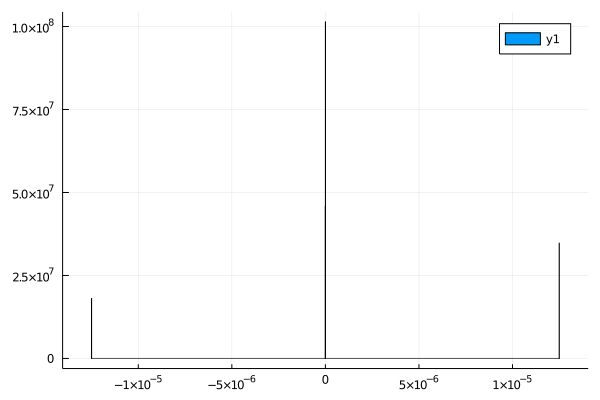

In [25]:
# distribution of weights
histogram(reshape(w1,:,1)[:,1],normalize=:pdf)

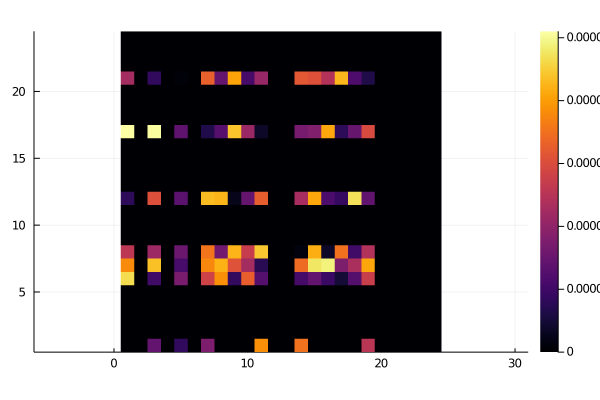

In [26]:
heatmap(abs.(value(w2)),aspect_ratio=1)

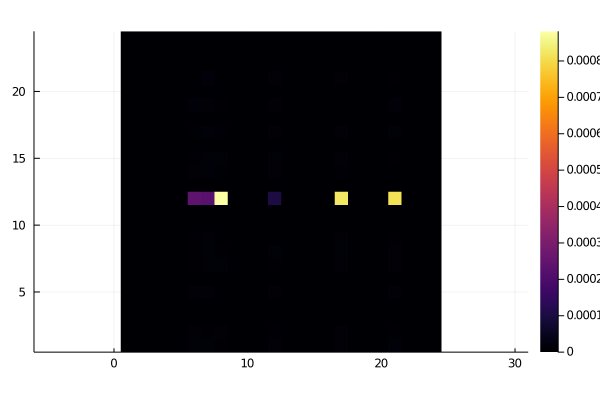

In [27]:
heatmap(abs.(value(w3)),aspect_ratio=1)

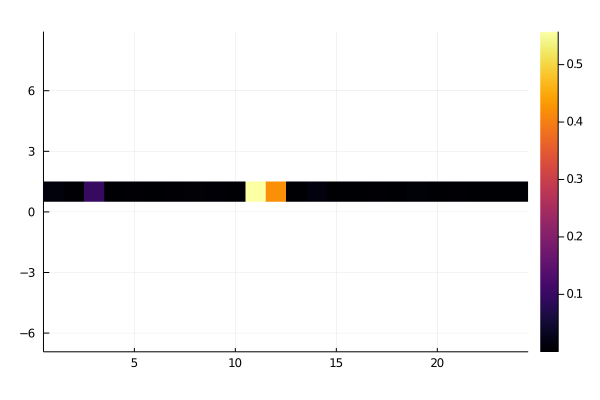

In [28]:
heatmap(abs.(value(w4)),aspect_ratio=1)